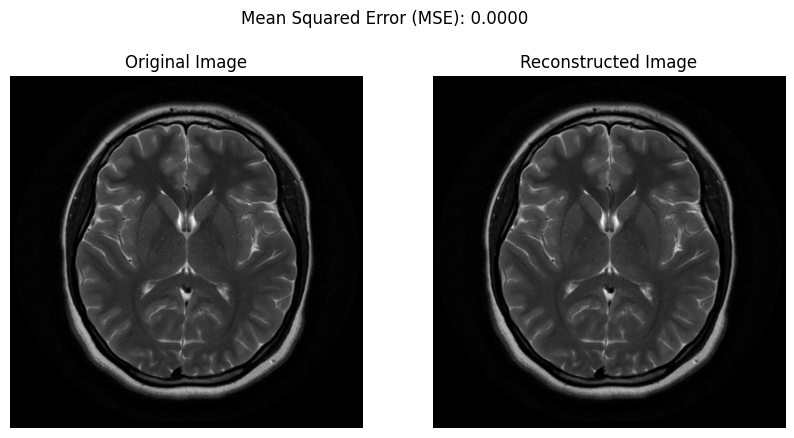

In [ ]:
from PIL import Image
import math
import cmath
import matplotlib.pyplot as plt

image_path = "1_no.jpeg"
image = Image.open(image_path).convert("L")
width, height = image.size

pixels = list(image.getdata())
pixels = [pixels[i * width:(i + 1) * width] for i in range(height)]

def dft_2d(image_matrix):
    M, N = len(image_matrix), len(image_matrix[0])
    dft_result = [[0] * N for _ in range(M)]

    for u in range(M):
        for v in range(N):
            sum_value = 0
          
            for x in range(M):
                for y in range(N):
                    angle = -2j * cmath.pi * ((u * x / M) + (v * y / N))
                    sum_value += image_matrix[x][y] * cmath.exp(angle)
            dft_result[u][v] = sum_value
    return dft_result

def idft_2d(dft_matrix):
    M, N = len(dft_matrix), len(dft_matrix[0])
    idft_result = [[0] * N for _ in range(M)]

    for x in range(M):
        for y in range(N):
            sum_value = 0
            for u in range(M):
                for v in range(N):
                    angle = 2j * cmath.pi * ((u * x / M) + (v * y / N))
                    sum_value += dft_matrix[u][v] * cmath.exp(angle)
            idft_result[x][y] = int(round(sum_value.real / (M * N)))
    return idft_result
dft_result = dft_2d(pixels)
idft_result = idft_2d(dft_result)
def compute_mse(original, reconstructed):
    M, N = len(original), len(original[0])
    error = 0
    for x in range(M):
        for y in range(N):
            error += (original[x][y] - reconstructed[x][y]) ** 2
    return error / (M * N)
mse = compute_mse(pixels, idft_result)
print(f"Mean Squared Error (MSE): {mse}")
reconstructed_image = Image.new("L", (width, height))
reconstructed_image.putdata([idft_result[i][j] for i in range(height) for j in range(width)])
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(reconstructed_image, cmap="gray")
axes[1].set_title("Reconstructed Image")
axes[1].axis("off")
plt.show()

Question_2

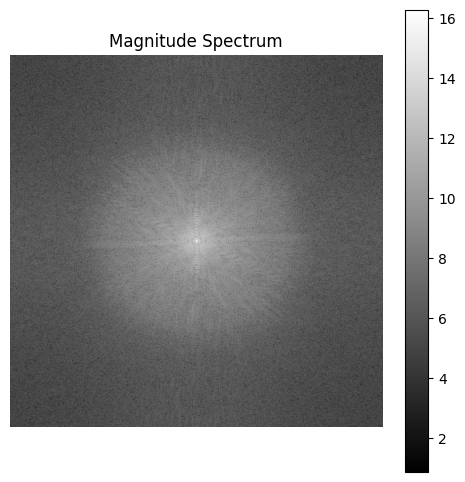

Power Spectrum: 3.4707e+14


In [2]:
import IPython.display as display
import cmath
import math
import matplotlib.pyplot as plt

image_path = "1_no.jpeg"
image = Image.open(image_path).convert("L")
width, height = image.size
pixels = list(image.getdata())
pixels = [pixels[i * width:(i + 1) * width] for i in range(height)]

def dft_2d(image_matrix):
    M, N = len(image_matrix), len(image_matrix[0])
    dft_result = [[0] * N for _ in range(M)]

    for u in range(M):
        for v in range(N):
            sum_value = 0
            for x in range(M):
                for y in range(N):
                    angle = -2j * cmath.pi * ((u * x / M) + (v * y / N))
                    sum_value += image_matrix[x][y] * cmath.exp(angle)
            dft_result[u][v] = sum_value

    return dft_result

dft_result = dft_2d(pixels)
print("DFT Computation Complete")
def compute_magnitude_spectrum(dft_matrix):
    M, N = len(dft_matrix), len(dft_matrix[0])
    magnitude_spectrum = [[0] * N for _ in range(M)]
    for u in range(M):
        for v in range(N):
            magnitude_spectrum[u][v] = math.log(1 + abs(dft_matrix[u][v].real))
    return magnitude_spectrum
magnitude_spectrum = compute_magnitude_spectrum(dft_result)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum")
plt.colorbar()
plt.axis("off")
plt.show()
def compute_power_spectrum(dft_matrix):
    M, N = len(dft_matrix), len(dft_matrix[0])
    power_spectrum = [[0] * N for _ in range(M)]
    for u in range(M):
        for v in range(N):
            power_spectrum[u][v] = abs(dft_matrix[u][v]) ** 2
    return power_spectrum
power_spectrum = compute_power_spectrum(dft_result)
log_power_spectrum = [[math.log(1 + power_spectrum[i][j]) for j in range(len(power_spectrum[0]))] for i in range(len(power_spectrum))]
plt.imshow(log_power_spectrum, cmap="gray")
plt.title("Magnitude Spectrum")
plt.colorbar()
plt.axis("off")
plt.show()

Question_3

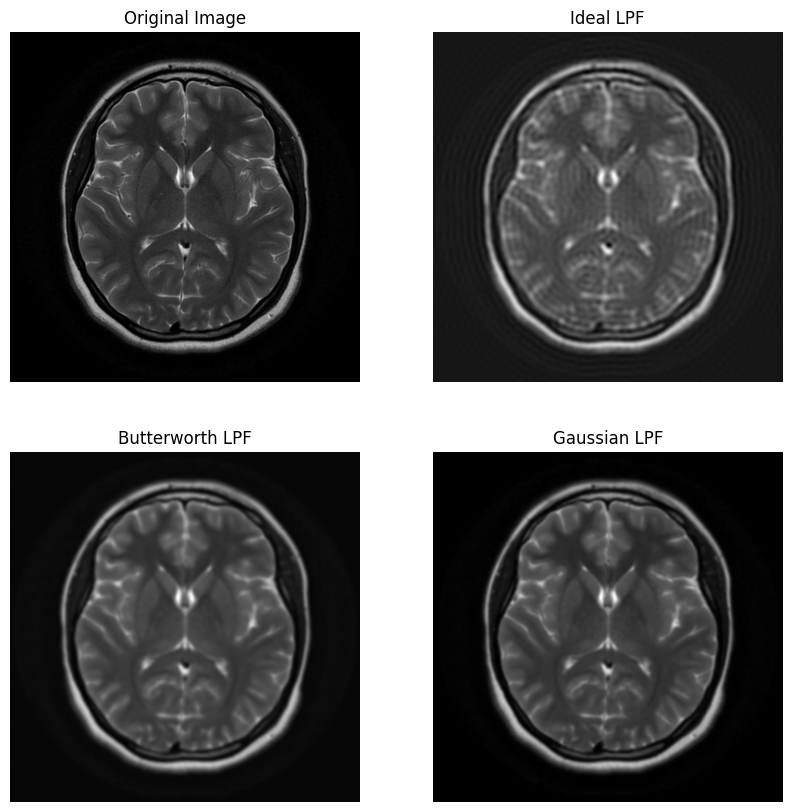

In [3]:
import IPython.display as display
import cmath
import math
import matplotlib.pyplot as plt

image_path = "1_no.jpeg"
image = Image.open(image_path).convert("L")
width, height = image.size
pixels = list(image.getdata())
pixels = [pixels[i * width:(i + 1) * width] for i in range(height)]

def dft_2d(image_matrix):
    M, N = len(image_matrix), len(image_matrix[0])
    dft_result = [[0] * N for _ in range(M)]

    for u in range(M):
        for v in range(N):
            sum_value = 0
            for x in range(M):
                for y in range(N):
                    angle = -2j * cmath.pi * ((u * x / M) + (v * y / N))
                    sum_value += image_matrix[x][y] * cmath.exp(angle)
            dft_result[u][v] = sum_value
    return dft_result

dft_result = dft_2d(pixels)
print("DFT Computation Complete")
def ideal_low_pass_filter(M, N, D0):
    """Ideal Low-Pass Filter (ILPF)"""
    filter_mask = [[1 if math.sqrt((u - M//2)**2 + (v - N//2)**2) <= D0 else 0 for v in range(N)] for u in range(M)]
    return filter_mask
def butterworth_low_pass_filter(M, N, D0, n=2):
    """Butterworth Low-Pass Filter (BLPF)"""
    filter_mask = [[1 / (1 + (math.sqrt((u - M//2)**2 + (v - N//2)**2) / D0) ** (2 * n)) for v in range(N)] for u in range(M)]
    return filter_mask

def gaussian_low_pass_filter(M, N, D0):
    """Gaussian Low-Pass Filter (GLPF)"""
    filter_mask = [[math.exp(-((u - M//2)**2 + (v - N//2)**2) / (2 * D0**2)) for v in range(N)] for u in range(M)]
    return filter_mask

ilpf = ideal_low_pass_filter(height, width, D0)
blpf = butterworth_low_pass_filter(height, width, D0, n=2)
glpf = gaussian_low_pass_filter(height, width, D0)
def apply_filter(dft_matrix, filter_mask):
    M, N = len(dft_matrix), len(dft_matrix[0])
    filtered_dft = [[dft_matrix[u][v] * filter_mask[u][v] for v in range(N)] for u in range(M)]
    return filtered_dft
dft_ilpf = apply_filter(dft_result, ilpf)
dft_blpf = apply_filter(dft_result, blpf)
dft_glpf = apply_filter(dft_result, glpf)
def idft_2d(dft_matrix):
    M, N = len(dft_matrix), len(dft_matrix[0])
    idft_result = [[0] * N for _ in range(M)]
    for x in range(M):
        for y in range(N):
            sum_value = 0
            for u in range(M):
                for v in range(N):
                    angle = 2j * cmath.pi * ((u * x / M) + (v * y / N))
                    sum_value += dft_matrix[u][v] * cmath.exp(angle)
            idft_result[x][y] = abs(sum_value) / (M * N)
    return idft_result
reconstructed_ilpf = idft_2d(dft_ilpf)
reconstructed_blpf = idft_2d(dft_blpf)
reconstructed_glpf = idft_2d(dft_glpf)
def display_image(matrix, title):
    plt.imshow(matrix, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()
display_image(pixels, "Original Image")
display_image(reconstructed_ilpf, "Ideal Low-Pass Filtered Image")
display_image(reconstructed_blpf, "Butterworth Low-Pass Filtered Image")
display_image(reconstructed_glpf, "Gaussian Low-Pass Filtered Image")

Question_4

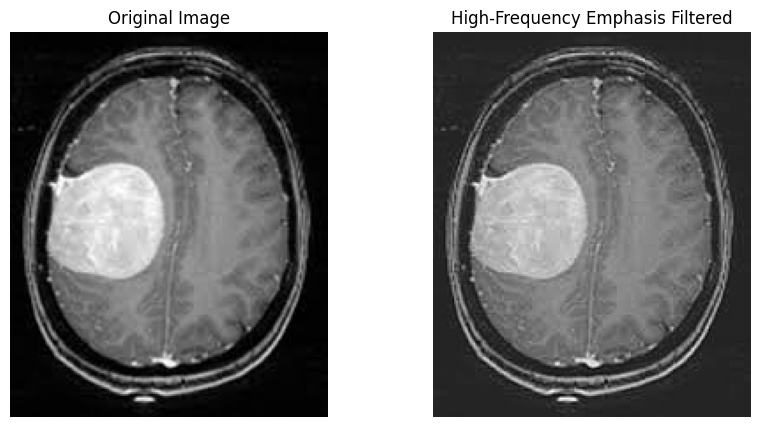

In [4]:
import cmath
import math
import matplotlib.pyplot as plt

image_path = "Y1.jpg"
image = Image.open(image_path).convert("L")
width, height = image.size
pixels = list(image.getdata())
pixels = [pixels[i * width:(i + 1) * width] for i in range(height)]

def dft_2d(image_matrix):
    M, N = len(image_matrix), len(image_matrix[0])
    dft_result = [[0] * N for _ in range(M)]
    for u in range(M):
        for v in range(N):
            sum_value = 0
            for x in range(M):
                for y in range(N):
                    angle = -2j * cmath.pi * ((u * x / M) + (v * y / N))
                    sum_value += image_matrix[x][y] * cmath.exp(angle)
            dft_result[u][v] = sum_value
    return dft_result
dft_result = dft_2d(pixels)
print("DFT Computation Complete")
def high_pass_filter(M, N, D0):
    """High-Pass Filter (HPF)"""
    filter_mask = [[1 - math.exp(-((u - M//2)**2 + (v - N//2)**2) / (2 * D0**2)) for v in range(N)] for u in range(M)]
    return filter_mask
def high_frequency_emphasis_filter(M, N, D0, A=0.5, B=1.5):
    """High-Frequency Emphasis Filter (HFEF)"""
    hpf = high_pass_filter(M, N, D0)
    return [[A + B * hpf[u][v] for v in range(N)] for u in range(M)]
D0 = 30
A = 0.5
B = 1.5
hfef = high_frequency_emphasis_filter(height, width, D0, A, B)
def apply_filter(dft_matrix, filter_mask):
    M, N = len(dft_matrix), len(dft_matrix[0])
    filtered_dft = [[dft_matrix[u][v] * filter_mask[u][v] for v in range(N)] for u in range(M)]
    return filtered_dft
dft_hfef = apply_filter(dft_result, hfef)
def idft_2d(dft_matrix):
    M, N = len(dft_matrix), len(dft_matrix[0])
    idft_result = [[0] * N for _ in range(M)]
    for x in range(M):
        for y in range(N):
            sum_value = 0
            for u in range(M):
                for v in range(N):
                    angle = 2j * cmath.pi * ((u * x / M) + (v * y / N))
                    sum_value += dft_matrix[u][v] * cmath.exp(angle)
            idft_result[x][y] = abs(sum_value) / (M * N)
    return idft_result
reconstructed_hfef = idft_2d(dft_hfef)
def display_image(matrix, title):
    plt.imshow(matrix, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()
display_image(pixels, "Original Image")
display_image(reconstructed_hfef, "High-Frequency Emphasis Filtered")

Question_6

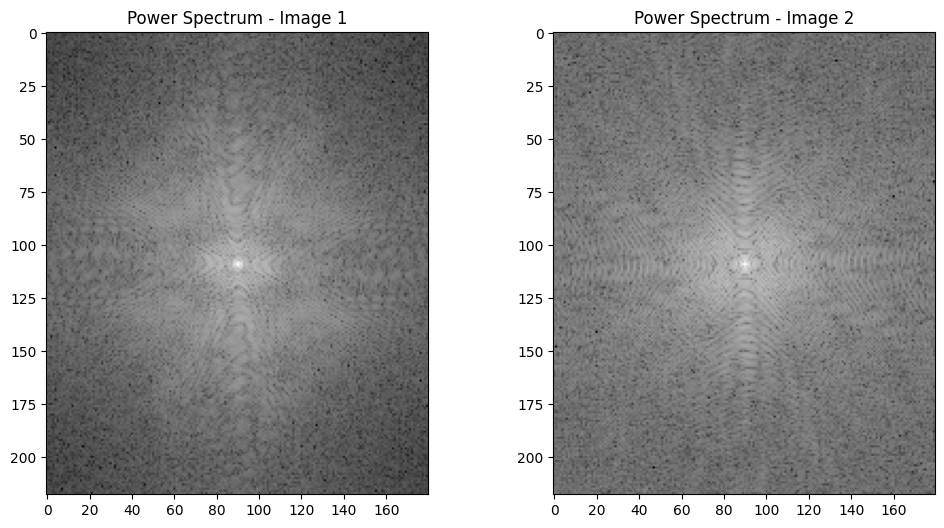

(81.01332823649338, 29.045238863918893)

In [5]:
import cmath
import math
from PIL import Image
import matplotlib.pyplot as plt

def load_image(image_path):
    image = Image.open(image_path).convert("L")
    width, height = image.size
    pixels = list(image.getdata())
    pixels = [pixels[i * width:(i + 1) * width] for i in range(height)]
    return pixels, width, height

img_1_no, width_1_no, height_1_no = load_image("1_no.jpeg")
img_Y1, width_Y1, height_Y1 = load_image("Y1.jpg")

def manual_dft(image, width, height):
    M, N = height, width
    dft_result = [[0] * N for _ in range(M)]
    for u in range(M):
        for v in range(N):
            sum_val = 0j
            for x in range(M):
                for y in range(N):
                    angle = -2 * math.pi * ((u * x / M) + (v * y / N))
                    sum_val += image[x][y] * cmath.exp(complex(0, angle))
            dft_result[u][v] = sum_val
    return dft_result

dft_Y1 = manual_dft(img_Y1, width_Y1, height_Y1)
dft_1_no = manual_dft(img_1_no, width_1_no, height_1_no)

def plot_spectrum(dft, title):
    M, N = len(dft), len(dft[0])
    magnitude = [[math.log(1 + abs(dft[u][v])) for v in range(N)] for u in range(M)]  # Compute log magnitude spectrum

    plt.figure(figsize=(6, 6))
    plt.imshow(magnitude, cmap="gray")
    plt.title(title)
    plt.colorbar()
    plt.show()
plot_spectrum(dft_Y1, "DFT Magnitude Spectrum - Y1.jpg")
plot_spectrum(dft_1_no, "DFT Magnitude Spectrum - 1_no.jpeg")


Question_7

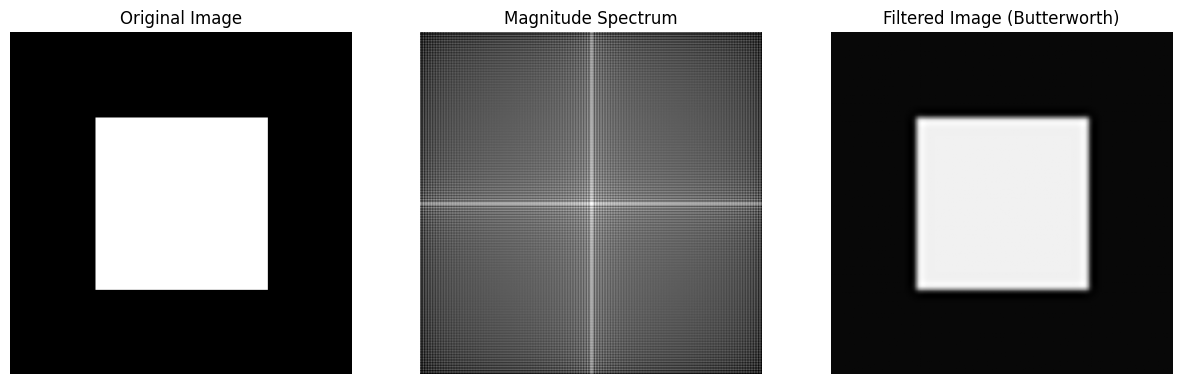

In [6]:
import cmath
import math

width, height = 256, 256
image = [[0 for _ in range(width)] for _ in range(height)]

square_size = 100
start_x, start_y = (width - square_size) // 2, (height - square_size) // 2

for i in range(start_y, start_y + square_size):
    for j in range(start_x, start_x + square_size):
        image[i][j] = 255
def display_image(image):
    for row in image:
        print("".join("_" if pixel > 128 else " " for pixel in row))
def manual_dft(image, width, height):
    M, N = height, width
    dft_result = [[0j for _ in range(N)] for _ in range(M)]
    for u in range(M):
        for v in range(N):
            sum_val = 0j
            for x in range(M):
                for y in range(N):
                    angle = -2 * math.pi * ((u * x / M) + (v * y / N))
                    sum_val += image[x][y] * cmath.exp(complex(0, angle))
            dft_result[u][v] = sum_val
    return dft_result

dft_image = manual_dft(image, width, height)
def butterworth_filter(dft, width, height, d0=20, n=2):
    M, N = height, width
    filtered_dft = [[0j for _ in range(N)] for _ in range(M)]

    for u in range(M):
        for v in range(N):
            d = math.sqrt((u - M//2)**2 + (v - N//2)**2)
            H = 1 / (1 + (d / d0)**(2*n))
            filtered_dft[u][v] = dft[u][v] * H
    return filtered_dft

filtered_dft = butterworth_filter(dft_image, width, height)

def manual_idft(dft, width, height):
    M, N = height, width
    idft_result = [[0 for _ in range(N)] for _ in range(M)]

    for x in range(M):
        for y in range(N):
            sum_val = 0j
            for u in range(M):
                for v in range(N):
                    angle = 2 * math.pi * ((u * x / M) + (v * y / N))
                    sum_val += dft[u][v] * cmath.exp(complex(0, angle))
            idft_result[x][y] = int(sum_val.real / (M * N))
    return idft_result

reconstructed_image = manual_idft(filtered_dft, width, height)

print("Original Synthetic Image:")
display_image(image)
print("\nReconstructed Image After Filtering:")
display_image(reconstructed_image)